In [1]:
import numpy as np
from DensityCanvas import DensityCanvas
from Lattice import Lattice

In [2]:
"""
First we need to define a DensityCanvas object.
This is basically an empty meshgrid with some additional features.
A DensityCanvas is defined by:
origin: the coordinates of the bottom left corner
length_x, length_y: the physical extent of the x and y direction
npoints_x, npoints_y: the number of points in the x and y direction
"""

# define a canvas
origin = (-20, -20)
length = 40
npoints = 80
canvas = DensityCanvas(
    origin=origin,
    length_x=length,
    length_y=length,
    npoints_x=npoints,
    npoints_y=npoints,
)
# this is an empty canvas of length 40x40 with 80 points in each direction
# (so a resolution of 2 points per unit length)

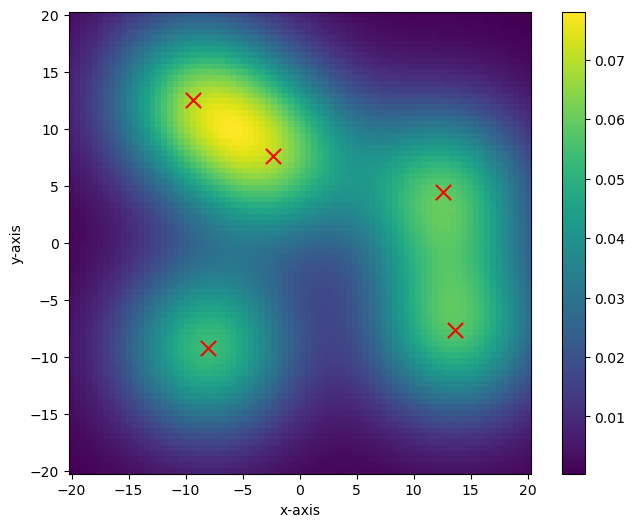

In [3]:
"""
Now it's possible to define a randomized Gaussian mixture on the canvas
with a minimal distance between the centers and a certain padding from the border
"""

# extract random centers with a minimal distance
# and a padding from border
seed = 18382
n_centers = 5 #number of Gaussians
min_dist = 6 #minimal distance between gaussians
padding = 6 #minimal distance of Gaussian centers from border
amplitude = 10 #amplitude of the Gaussians
variance = 30 #variance of the Gaussians

canvas.set_randomized_gaussian_density(
    n_centers = n_centers,
    amplitude = amplitude,
    variance = variance,
    minimal_distance = min_dist,
    padding = padding,
    seed = seed
)

# To see the result, call the draw method with draw_centers=True
canvas.draw(draw_centers=True, figsize=(8,6))

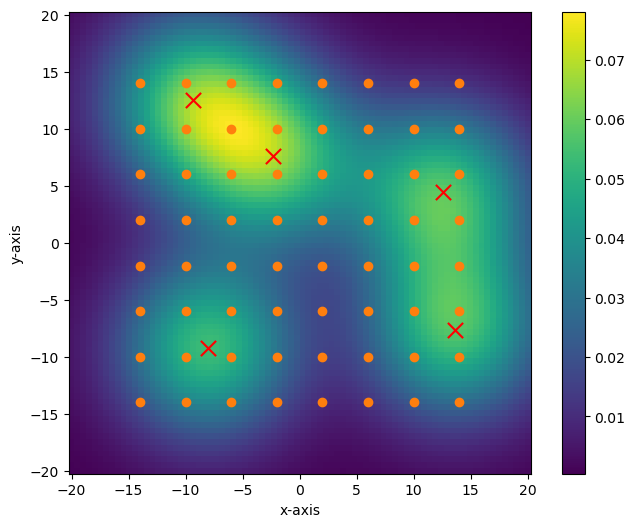

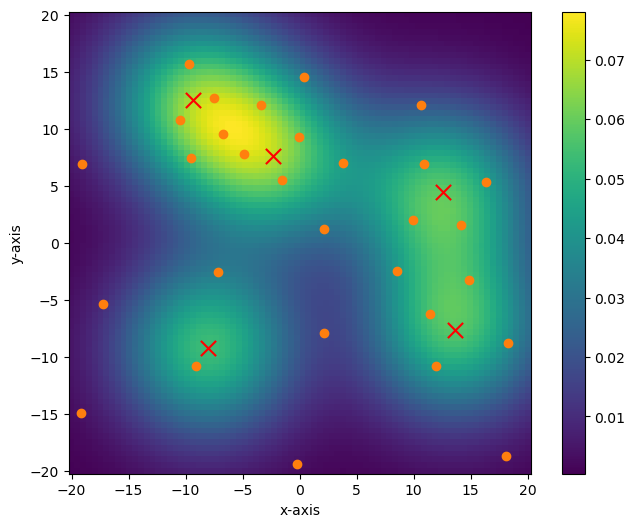

In [4]:
"""
Now we can define a lattice of points on the density.
There are two ways of doing that:
1) Rectangular lattice
2) Poisson disk sampling
"""

# Define a 8x8 rectangular lattice with spacing of 4
canvas.set_rectangular_lattice(num_x=8, num_y=8, spacing=4)
canvas.draw(draw_centers=True, draw_lattice=True, labels=False, figsize=(8,6))


"""
Poisson disk sampling allows to extract points uniformly in space with
a minimal spacing between each other.
The minimal spacing is not a fixed number, it is a tuple (r1, r2), where:
r1 is the minimal spacing in regions of highest density
r2 is the minimal spacing in regions of lowest density
"""

# Define a Poisson disk lattice.
canvas.set_poisson_disk_lattice(spacing=(2,10))
canvas.draw(draw_centers=True, draw_lattice=True, labels=False, figsize=(8,6))


In [5]:
"""
Once a lattice has been defined, it is possible to calculate the QUBO (or in general PUBO)
coefficients. In order to do so, an estimate for the variance and amplitude of the Gaussian needs
to be given.
"""

estimated_variance = 25
estimated_amplitude = 13

canvas.calculate_pubo_coefficients(
    p = 2, #order of the PUBO, p=2 effectively creates a QUBO
    params = [estimated_amplitude, estimated_variance]
)

In [6]:
"""
Once calculated, the coefficients are stored in an attribute of the DensityCanvas class.
They are stored as a dictionary where the key is the order (1=linear, 2=quadratic, etc)
"""

coefficients = canvas._pubo["coeffs"]

print("Linear coefficients:")
print(coefficients[1])

print()

print("Quadratic coefficients:")
print(coefficients[2])

Linear coefficients:
{(0,): -0.23517630356499397, (1,): -0.47953648213456534, (2,): -0.43003691094452334, (3,): -0.3134479692031051, (4,): -0.49647559422081755, (5,): -0.06935893705703777, (6,): -0.5615773078707273, (7,): 0.0821106719640684, (8,): -0.5136430853647437, (9,): -0.513675666255118, (10,): -0.1202050821736832, (11,): 0.12231776710109438, (12,): -0.45428855419481684, (13,): -0.3085933556360415, (14,): -0.21871796714355152, (15,): -0.24503376650864672, (16,): -0.40987449147198707, (17,): -0.5789670831221027, (18,): 0.08868189558072115, (19,): -0.3089499321691893, (20,): -0.7559499281074507, (21,): -0.6508135774458678, (22,): -0.41053336297164494, (23,): -0.6233350382687456, (24,): -0.6562842034749976, (25,): 0.137827647125801, (26,): -0.7506593836991617, (27,): 0.03379637539390251, (28,): -0.6526440903764738, (29,): -0.5645921873971496}

Quadratic coefficients:
{(0, 1): 0.46686830133555945, (0, 2): 0.0955636503921622, (0, 3): 0.06266297540455586, (0, 4): 0.5317376613638944, (0

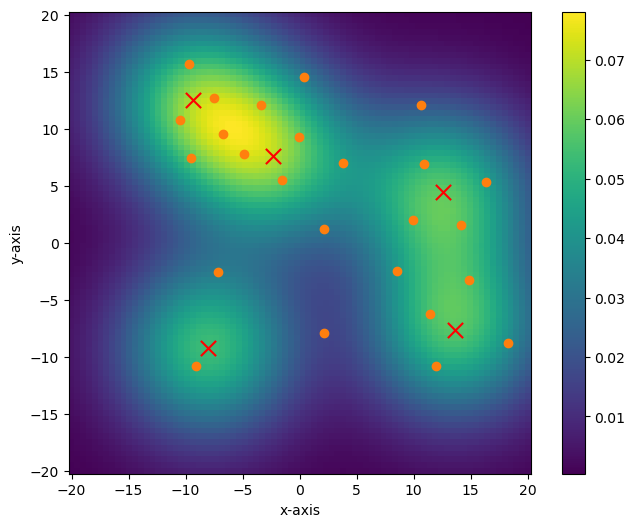

In [10]:
"""
It is advisable to cut the number of lattice points by discarding
points associated with a positive linear coefficient
"""

canvas.decimate_lattice()
canvas.draw(draw_centers=True, draw_lattice=True, labels=False, figsize=(8,6))

In [11]:
"""
After decimation the coefficients are updated accordingly
"""

coefficients = canvas._pubo["coeffs"]

print("Linear coefficients:")
print(coefficients[1])

print()

print("Quadratic coefficients:")
print(coefficients[2])

Linear coefficients:
{(0,): -0.23517630356499397, (1,): -0.47953648213456534, (2,): -0.43003691094452334, (3,): -0.3134479692031051, (4,): -0.49647559422081755, (5,): -0.06935893705703777, (6,): -0.5615773078707273, (7,): -0.5136430853647437, (8,): -0.513675666255118, (9,): -0.1202050821736832, (10,): -0.45428855419481684, (11,): -0.3085933556360415, (12,): -0.21871796714355152, (13,): -0.24503376650864672, (14,): -0.40987449147198707, (15,): -0.5789670831221027, (16,): -0.3089499321691893, (17,): -0.7559499281074507, (18,): -0.6508135774458678, (19,): -0.41053336297164494, (20,): -0.6233350382687456, (21,): -0.6562842034749976, (22,): -0.7506593836991617, (23,): -0.6526440903764738, (24,): -0.5645921873971496}

Quadratic coefficients:
{(0, 1): 0.46686830133555945, (0, 2): 0.0955636503921622, (0, 3): 0.06266297540455586, (0, 4): 0.5317376613638944, (0, 5): 0.005650313816096454, (0, 6): 0.1951264749624771, (0, 7): 0.02337827860840717, (0, 8): 0.21595694471645882, (0, 9): 0.3670244478736